In [8]:
import sys
import os
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

from statistics import mean 
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

### find the "identity plot" referenced by lynn... a way to explore / quantify correlation between in vitro vs. in vivo telo lengths 
### it may also be called a pair plot ? ... 
### make boxen plot with timepoint on x, y axis is each individual 
### i.e have a 2x2 subplot, where each subplot is a timepoint, & each box is a patient's individual telomere length 
### do identity plot (correlation plot? pair plot?) for telos vs. total & individual types of chromosome aberraitons 

In [9]:
def generate_dictionary_from_TeloLength_and_Chr_aberr_Data(patharg):

    """
    opens raw telomere length count excel files from imageJ analyses and
    extracts the individual mean telomere lengths to make histograms;
    opens chromosome rearrangement frequency files and extracts data
    both telos & chr rearrangement frequencies are stored as values to their
    sample timepoint keys, which themselves are values to patient id# key

    i.e the data structure is:

    dict = {
    patient_IDnumber = 
    {SW#A non irrad: [telos data, chr aberr data], 
    SW#A irrad @ 4 Gy: [telos data, chr aberr data]},

    etc.
    }

    i.e:

    all_patients_dict = {
    '1' = {
    'SW1A non irrad': ['telomere data', 'chr aberr data'],
    'SW1A irrad @ 4 Gy': ['telomere data', ' chr aberr data']},

    etc. for patients 1 - 16 (less #4 missing)
    }

    pass the directory where the telomere length excel files (.xlsx) are located
    """

    all_patients_dict = {}

    for file in os.scandir(patharg):
        if file.name.endswith('.xlsx') and file.name.startswith('~$') == False:
        
            try:
                df = pd.read_excel(file)

            except:
                print('File not found..')
                return -1

            print(file.name, 'in progress..', 'it works peggy!! <3 <3 !!')
           
            if 'chr' not in file.name:
                
                telo_data = extract_and_clean_telos(df, file.name)
#                 telo_data = telo_data.iloc[:,0]
                
#                 df.rename(columns={'Unnamed: 3':'Mean Individ Telos'}, inplace=True)
#                 mean_values_of_individual_telomere_lengths = (df['Mean Individ Telos'])
#                 mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.drop(labels=[5, 192, 379, 566, 753, 940, 1127, 1314,
#                     1501, 1688, 1875, 2062, 2249, 2436, 2623, 2810, 2997, 3184, 3371, 3558, 3745, 3932, 4119, 4306, 4493, 4680, 4867, 5054, 5241, 5428,
#                     5615, 5802, 5989, 6176, 6363, 6550, 6737, 6924, 7111, 7298, 7485, 7672, 7859, 8046, 8233, 8420, 8607, 8794, 8981, 9168])
            
#                 mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.iloc[6:9350]
#                 meantelos_str_toNaN = pd.to_numeric(mean_values_of_individual_telomere_lengths, errors='coerce')
#                 mean_individual_telos_cleaned = meantelos_str_toNaN.dropna(axis=0, how='any')
#                 mean_individ_df = mean_individual_telos_cleaned.to_frame(name=None)
#                 telo_data = mean_individ_df[(np.abs(stats.zscore(mean_individ_df)) < 3).all(axis=1)]

            else:
                continue


            # print(file.name, mean_individ_df.describe(), '\n\n\n',)
            file = file.name.replace('.xlsx', '').rstrip()
            data_list = []
            file_chr = ''

#             if 'hTERT' in file:
#                 file = file.replace(file[2], file[-1])

            num, num2 = capture_patient_sample_ID(file)

            if 'chr' in file:
                file_chr = file
                file = file.replace('chr','').rstrip()

            if file[num:num2] not in all_patients_dict.keys():
                all_patients_dict[file[num:num2]] = {file: []}

                if len(all_patients_dict[file[num:num2]][file]) == 0:
                    all_patients_dict[file[num:num2]][file] = data_list
                    if 'chr' not in file_chr:
                        data_list.append(telo_data)
                        data_list.sort()
                    elif 'chr' in file_chr:
                        data_list.append(chr_data)
                        data_list.sort()

                elif len(all_patients_dict[file[num:num2]][file]) == 1:
                    if 'chr' not in file_chr:
                        data_list.append(telo_data)
                        data_list.sort()
                    elif 'chr' in file_chr:
                        data_list.append(chr_data)
                        data_list.sort()

            elif file[num:num2] in all_patients_dict.keys():
                if file in all_patients_dict[file[num:num2]]:
                    if 'chr' not in file_chr:
                        all_patients_dict[file[num:num2]][file].append(telo_data)
                        all_patients_dict[file[num:num2]][file].sort()
                    elif 'chr' in file_chr:
                        all_patients_dict[file[num:num2]][file].append(chr_data)
                        all_patients_dict[file[num:num2]][file].sort()

                elif file not in all_patients_dict[file[num:num2]]:     
                    all_patients_dict[file[num:num2]][file] = data_list
                    if 'chr' not in file_chr:
                        all_patients_dict[file[num:num2]][file].append(telo_data)
                        all_patients_dict[file[num:num2]][file].sort()
                    elif 'chr' in file_chr:
                        all_patients_dict[file[num:num2]][file].append(chr_data)
                        all_patients_dict[file[num:num2]][file].sort()
                        
    print('completed file collection')
    return all_patients_dict

In [10]:
all_patients_dict = generate_dictionary_from_TeloLength_and_Chr_aberr_Data('.')

SW9A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW9_.xlsx in progress.. it works peggy!! <3 <3 !!
SW11A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW15_.xlsx in progress.. it works peggy!! <3 <3 !!
SW6A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
SW6A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW8B.xlsx in progress.. it works peggy!! <3 <3 !!
SW14A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW8A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW5A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW8C.xlsx in progress.. it works peggy!! <3 <3 !!
SW1A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW11_.xlsx in progress.. it works peggy!! <3 <3 !!
SW16A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW13_.xlsx in progress.. it works peggy!! <3 <3 !!
BJ-hTERT for SW9_.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW14_.xlsx in progress.. it works peggy

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:2275: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:130: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


SW3A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW11A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW16_.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW12_.xlsx in progress.. it works peggy!! <3 <3 !!
SW8A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
BJ-hTERT for SW8_.xlsx in progress.. it works peggy!! <3 <3 !!
SW10A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
SW12A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW9C.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW10_.xlsx in progress.. it works peggy!! <3 <3 !!
SW7A non irrad.xlsx in progress.. it works peggy!! <3 <3 !!
SW1A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW13A irrad @ 4 Gy.xlsx in progress.. it works peggy!! <3 <3 !!
SW1B.xlsx in progress.. it works peggy!! <3 <3 !!
BJ-hTERT for SW6_.xlsx in progress.. it works peggy!! <3 <3 !!
SW13B.xlsx in progress.. it works peggy!! <3 <3 !!
BJ1 for SW2_.xlsx in progress.. it works peggy!

In [118]:
# for i in range(1,17):
#     if str(i) in all_patients_dict.keys():
#         for sample in sorted(all_patients_dict[str(i)].keys()):
#             print(sample)

In [96]:
def generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict):

    data = []

    for i in range(1,17):
        if str(i) in all_patients_dict.keys():
            for sample in sorted(all_patients_dict[str(i)].keys()):
                #61319 HI PEGGY GIRLLLLLL STEAK 
                telos = all_patients_dict[str(i)][sample][0]
                # chr = all_patients_dict[str(i)[timepoint][1]
                chr_d = 'chr data'
                working_status = 'IT WORKS PEGGY <333'
                
                #to fix mixing of df's w/ 
                
                if 'hTERT' in sample:
                    #average of all hTERT samples is 79.9762
                    #CF = correction factor
                    hTERT_avg = 79.9762
#                     hTERT_CF1 = hTERT_avg / np.mean(telos).values
                    hTERT_CF1 = hTERT_avg / telos['Mean Individ Telos'].mean()
#                     print(hTERT_CF1, hTERT_CF1test)

                
                elif 'BJ1' in sample:
                    #average of all BJ1 samples is 69.5515
                    #CF = correction factor
                    BJ1_avg = 69.5515
                    BJ1_CF2 = BJ1_avg / telos['Mean Individ Telos'].mean()
   
                    CF_mean = (hTERT_CF1 + BJ1_CF2) / 2
#                     print('bj1', np.mean(telos).values)
#                     print('bj1 cf', BJ1_CF2)
#                     print(CF_mean)
                    #double check ctrl values...

                
                elif 'non irrad' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_A_nonRAD_name = sample
                    SW_A_nonRAD = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '1 ' + 'non irrad', telos_samp.multiply(CF_mean), chr_d, working_status])

                elif 'irrad @ 4 Gy' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_A_irrad4Gy_name = sample
                    SW_A_irrad4Gy = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '2 ' + 'irrad @ 4 Gy', telos_samp.multiply(CF_mean), chr_d, working_status])

                elif 'B' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_B_name = sample
                    SW_B = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '3 ' + 'B', telos_samp.multiply(CF_mean), chr_d, working_status])
                    
                elif 'C' in sample:
                    num, num2 = capture_patient_sample_ID(sample)
                    SW_C_name = sample
                    SW_C = telos
                    telos_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, telos, 'rsamp')
                    telos_samp = telos_samp.iloc[:,0]
                    data.append([sample[num:num2], '4 ' + 'C', telos_samp.multiply(CF_mean), chr_d, working_status])

                else:
                    print('error with making dataframe from dict..')
                    print(sample)
                    continue

                
            SW_A_nonRAD_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_nonRAD, 'rsamp')
            SW_A_irrad4Gy_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_A_irrad4Gy, 'rsamp')
            SW_B_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_B, 'rsamp')
            SW_C_samp = gen_missing_values_andimpute_or_randomsampledown(50, 92, SW_C, 'rsamp')

            SW_A_nonRADarray = SW_A_nonRAD_samp.to_numpy()
            SW_A_irrad4Gyarray = SW_A_irrad4Gy_samp.to_numpy()
            SW_Barray = SW_B_samp.to_numpy()
            SW_Carray = SW_C_samp.to_numpy()


            n_bins = 50
            fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(12.8, 9.6))
        
            histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_nonRAD_samp, SW_A_nonRADarray, SW_A_nonRAD_name, 0, 0)
            histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_A_irrad4Gy_samp, SW_A_nonRADarray, SW_A_irrad4Gy_name, 0, 1)
            histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_B_samp, SW_A_nonRADarray, SW_B_name, 1, 0)
            histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, SW_C_samp, SW_A_nonRADarray, SW_C_name, 1, 1)

            if 'BJ1' not in sample and 'hTERT' not in sample:
                plt.savefig(f'SW{sample[2]}_histogram.pdf')
            plt.show()
                
    
    all_patients_df = pd.DataFrame(data, columns=['patient id', 'timepoint', 'telo data', 'chr data', 'status'])
    all_patients_df['patient id'] = all_patients_df['patient id'].astype('int')
    all_patients_df = all_patients_df.sort_values(by=['patient id', 'timepoint'], ascending=True, axis=0).reset_index(drop=True)
    all_patients_df['telo means'] = all_patients_df['telo data'].apply(lambda row: np.mean(row))
    
    all_patients_df['Q1'] = 'telos nonRAD Q1 <0.25'
    all_patients_df['Q2-3'] = 'telos nonRAD Q2-3 >0.25 & <0.75'
    all_patients_df['Q4'] = 'telos nonRAD Q4 >0.75'

    return all_patients_df
                

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


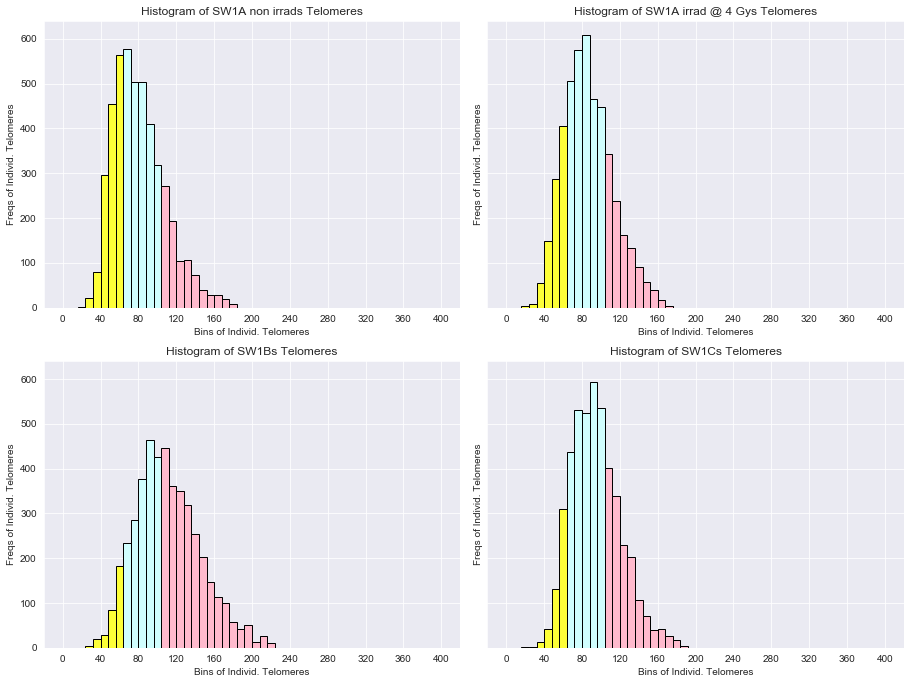

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


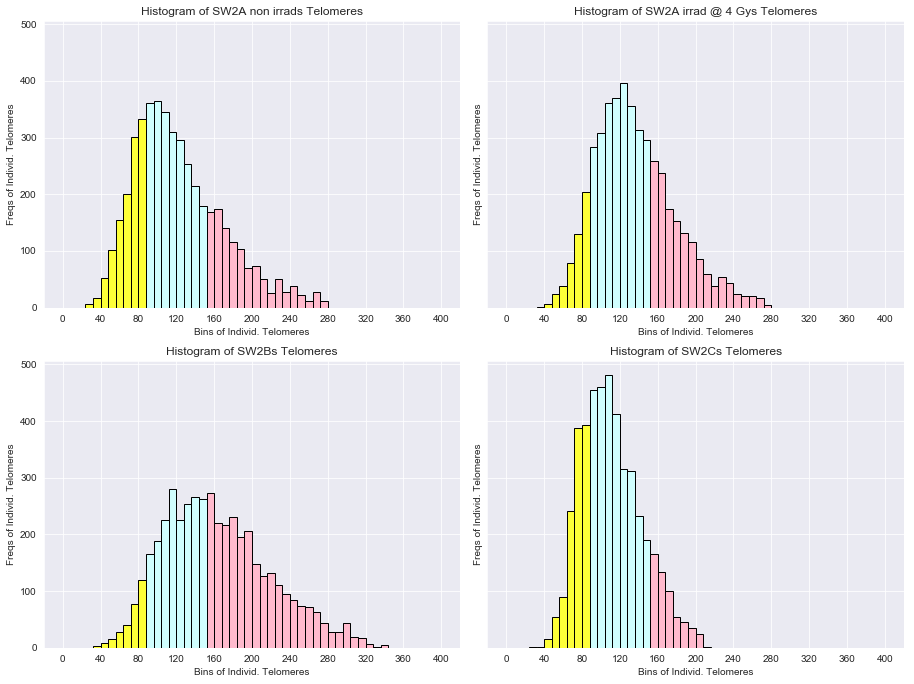

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


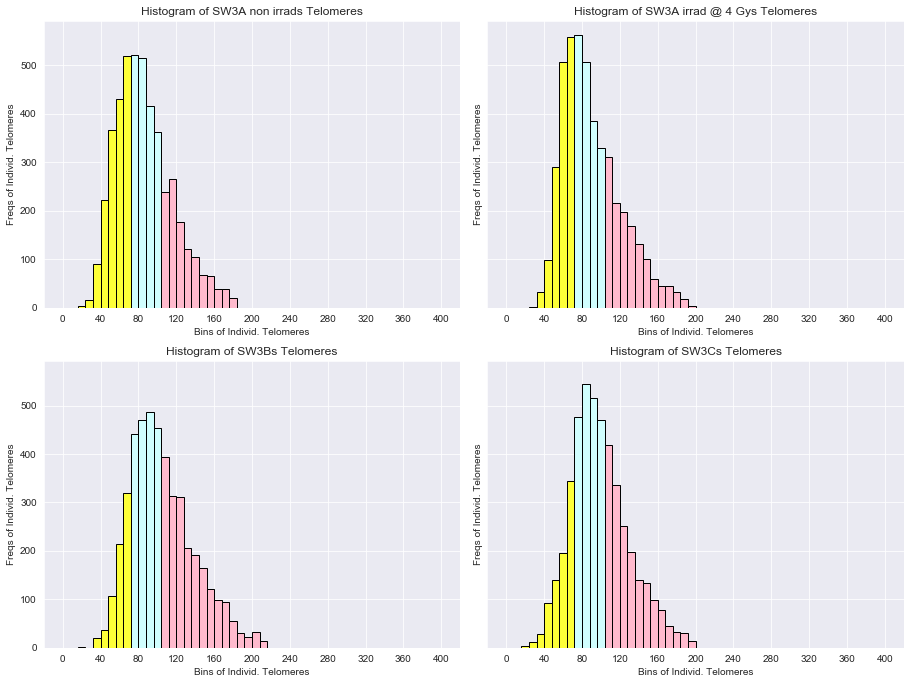

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


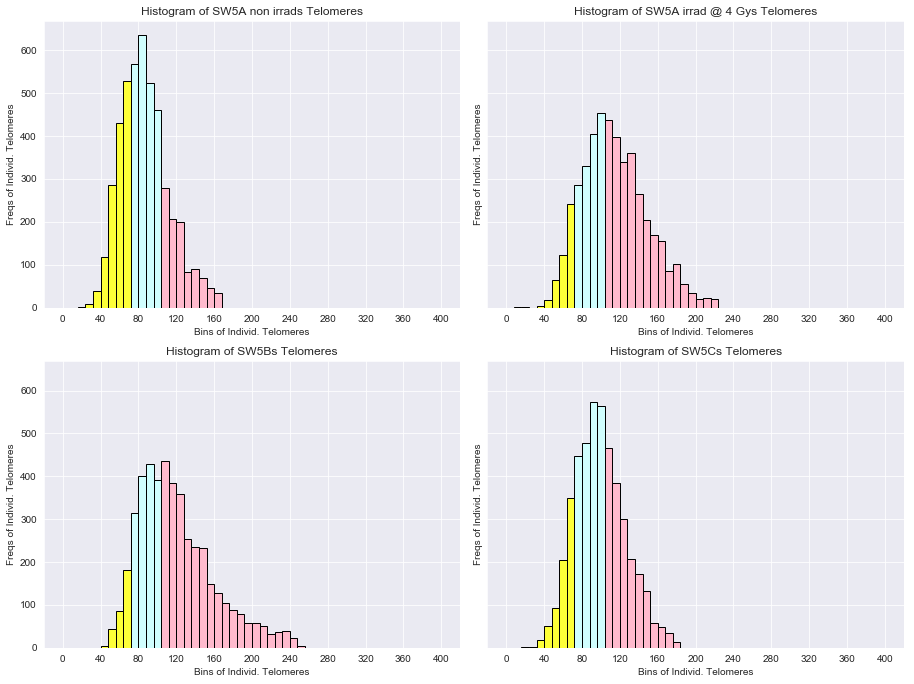

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


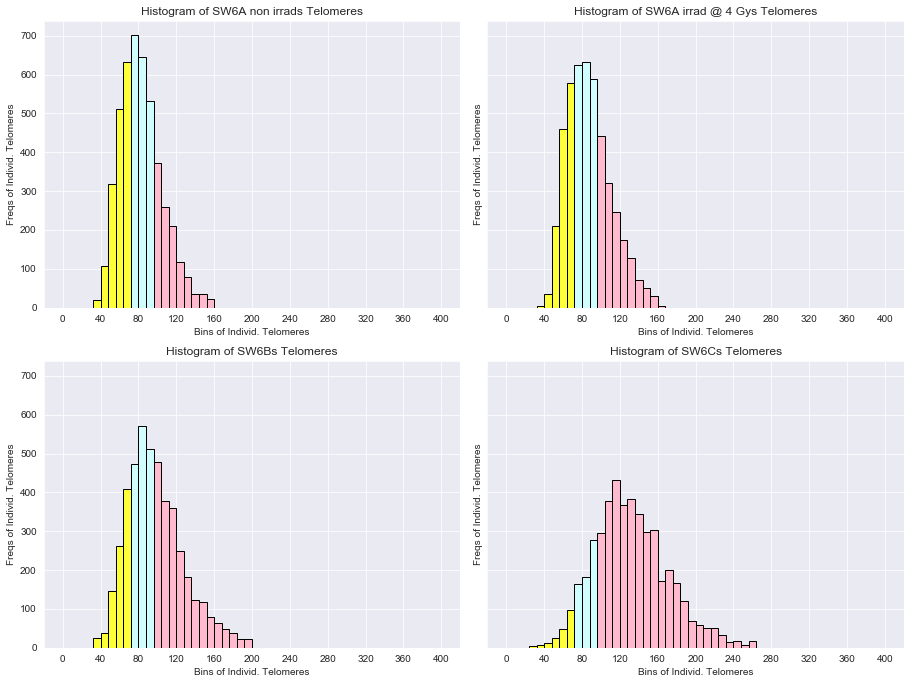

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


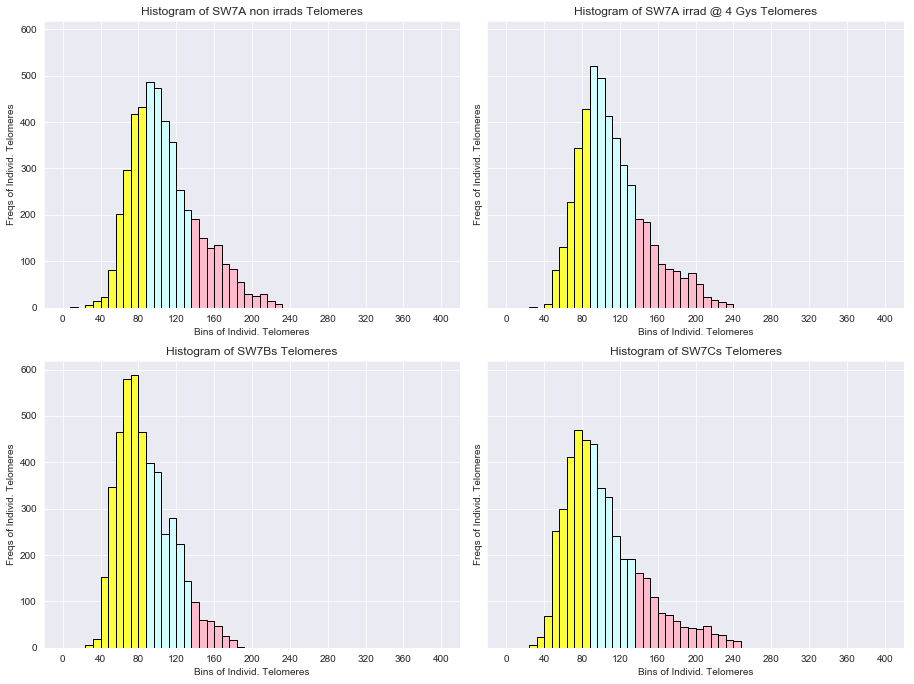

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


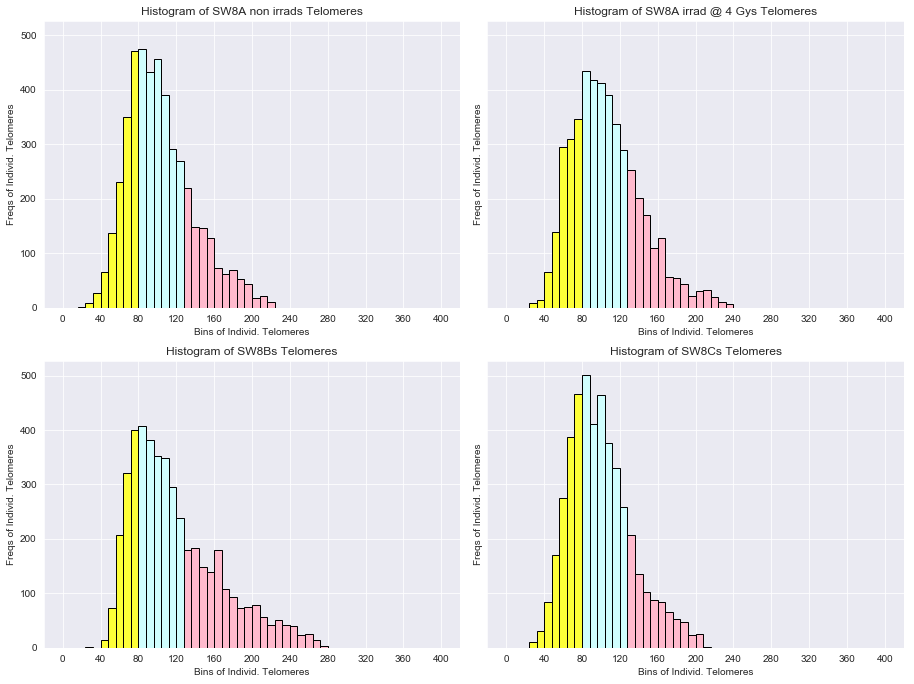

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


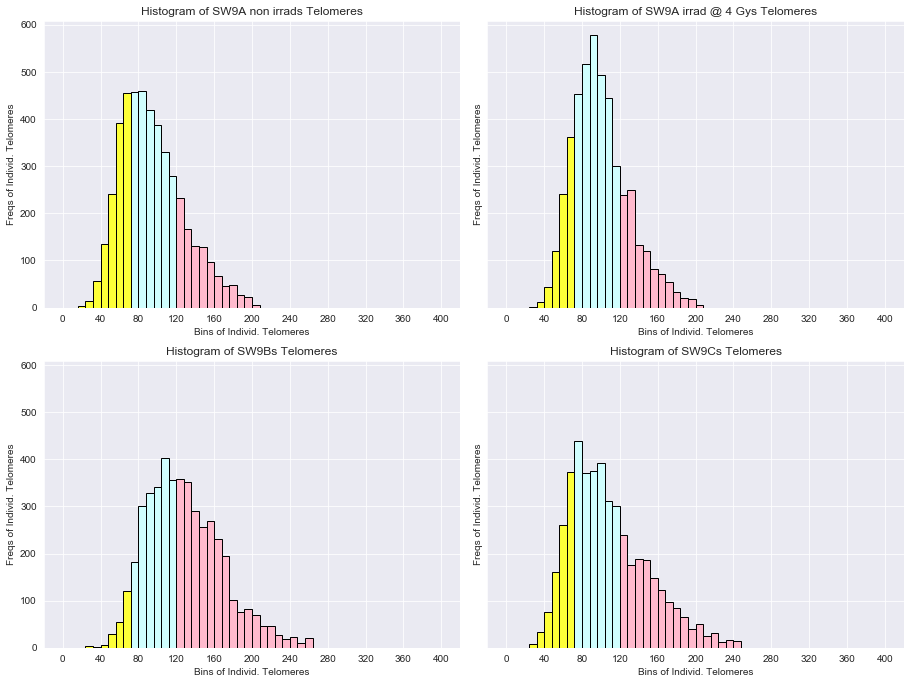

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


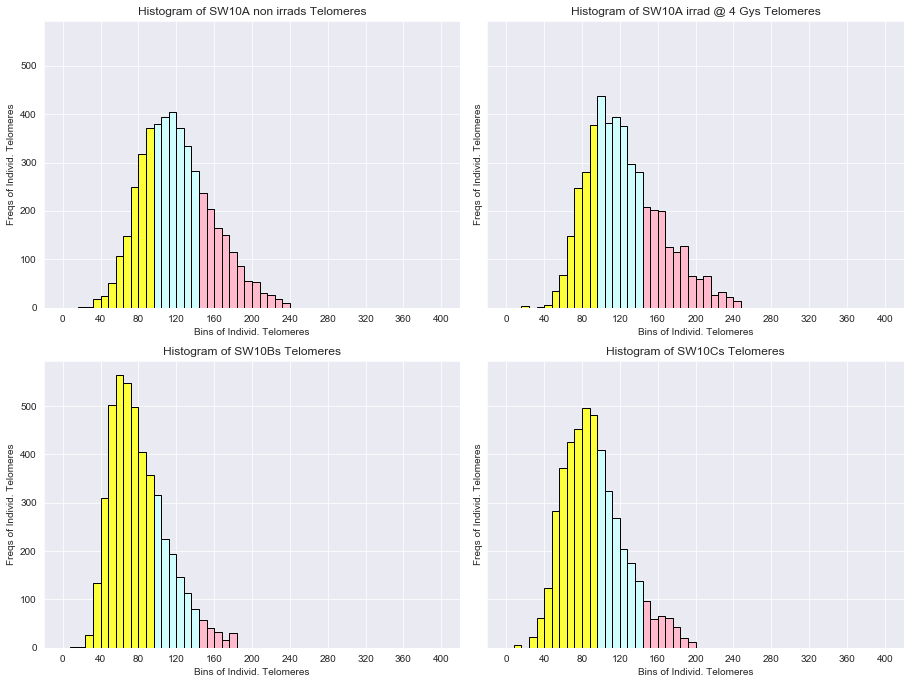

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


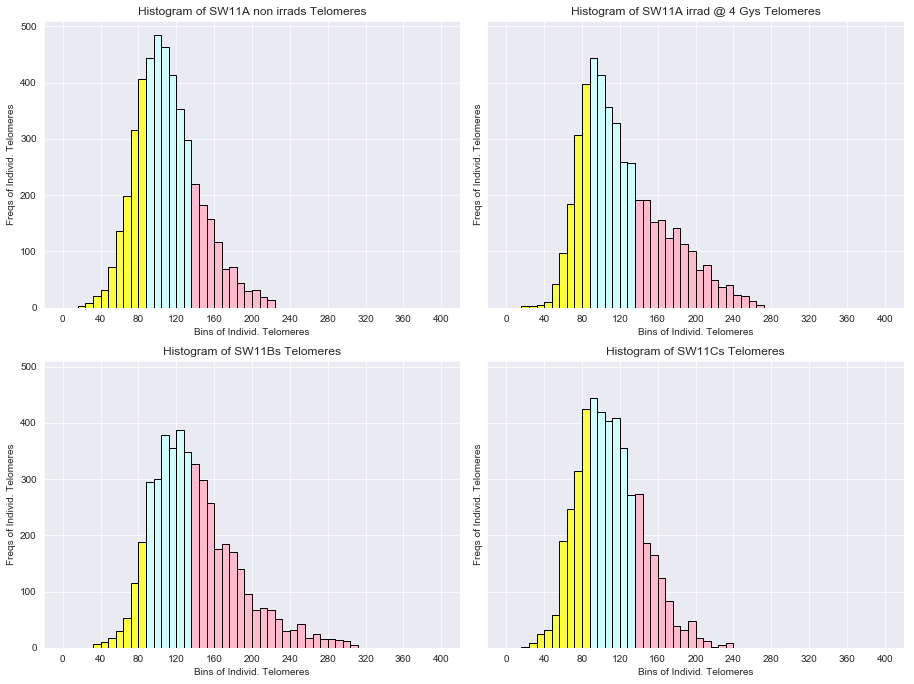

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


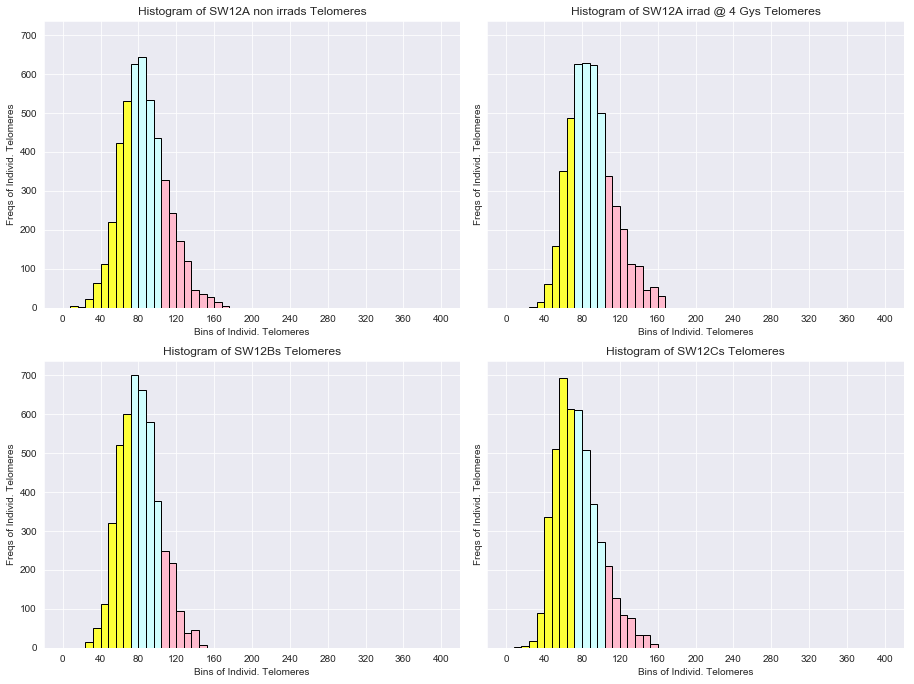

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


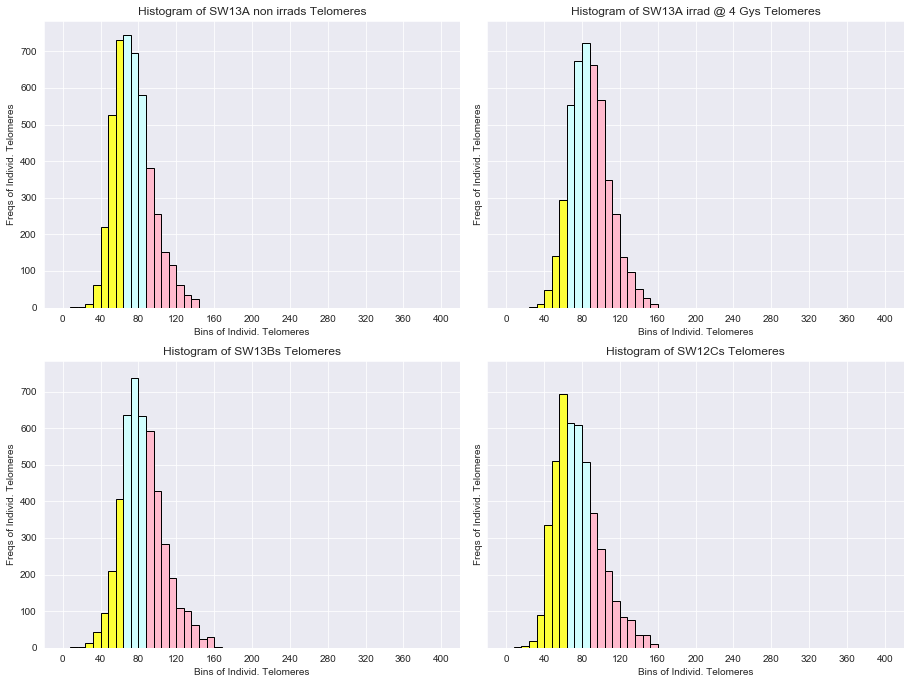

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


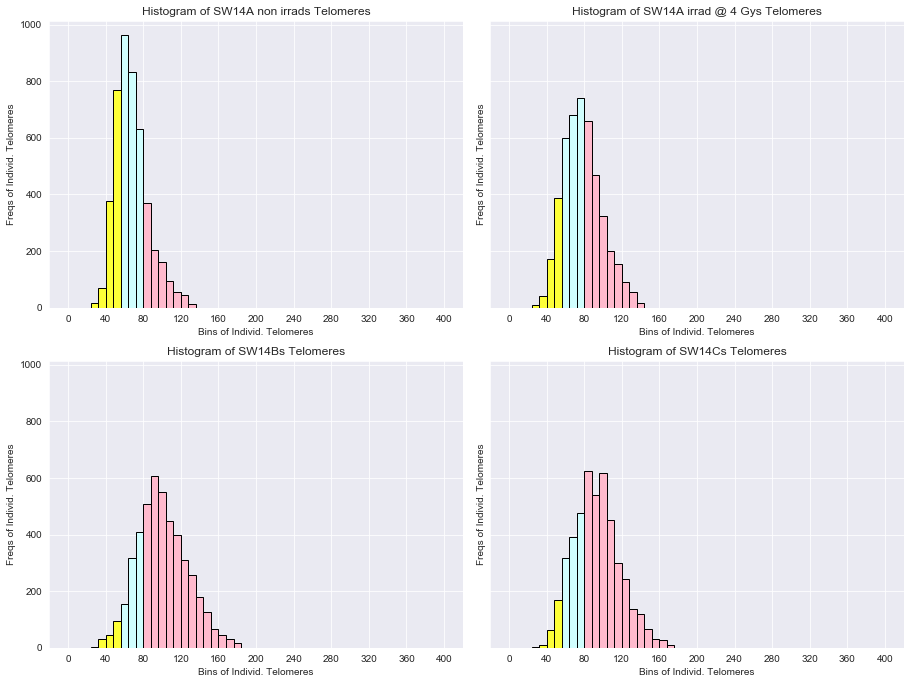

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


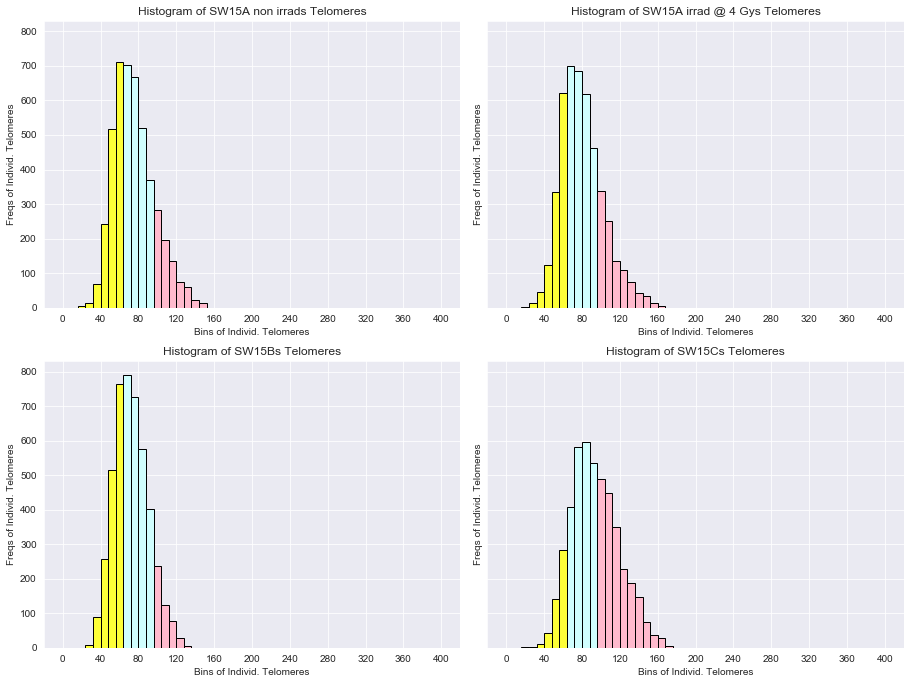

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


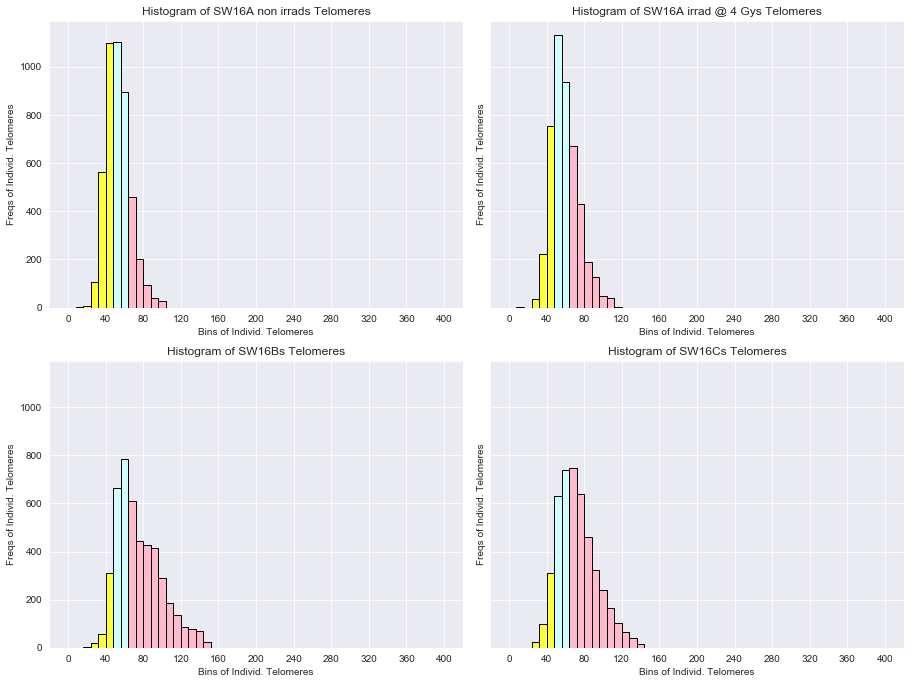

In [97]:
sns.set_style(style="darkgrid")
all_patients_df = generate_dataframe_from_dict_and_generate_histograms_stats(all_patients_dict)

In [16]:
all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,0 108.754190 1 73.910614 2 ...,chr data,IT WORKS PEGGY <333,84.796738,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
1,1,2 irrad @ 4 Gy,0 51.737430 1 123.536313 2 ...,chr data,IT WORKS PEGGY <333,90.975987,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
2,1,3 B,0 108.754190 1 145.709497 2 ...,chr data,IT WORKS PEGGY <333,116.780229,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75
3,1,4 C,0 124.592179 1 136.206704 2 ...,chr data,IT WORKS PEGGY <333,99.346663,telos nonRAD Q1 <0.25,telos nonRAD Q2-3 >0.25 & <0.75,telos nonRAD Q4 >0.75


In [17]:
# sns.boxenplot(x='timepoint', y='telo data', data=all_patients_df.iloc[0])

# all_patients_df['test'] = all_patients_df['telo data'].apply(lambda row: row.tolist())

In [157]:
pwd

'/Users/jaredjamesluxton/Desktop/PYTHON projects ala prostate cancer NASA others/prostate cancer IMRT excel sheets copy testing'

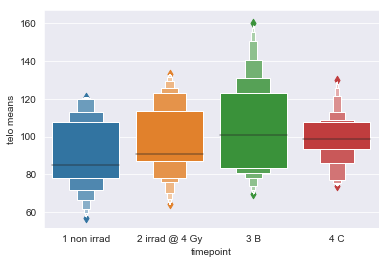

In [18]:
sns.boxenplot(x='timepoint',y='telo means', data=all_patients_df)

In [98]:
### FIND QUARTILES OF NON IRRAD TIMEPOINT & MAKE BASELINE..
### find individual telomeres below the 0.25 percentile (a), between
### the 0.25 & 0.75 percentile (b), & above the 0.75 percentile (c)

def quartile_cts_rel_to_df1(df1, df2):
    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)
    
    quartile_1 = df2[df2 <= df1.quantile(0.25)].count()
    
    quartile_2_3 = df2[(df2 > df1.quantile(0.25)) & (df2 < df1.quantile(0.75))].count()

    quartile_4 = df2[df2 >= df1.quantile(0.75)].count()
    
    return quartile_1.values, quartile_2_3.values, quartile_4.values


### LOOP THROUGH DATAFRAME FOR EACH PATIENT, ESTABLISH BASELINE QUARTILES FOR INDIVIDUAL TELOMERES USING NON IRRAD 
### SAMPLE TIMEPOINT.. THEN DETERMINES FOR EACH TIMEPOINT (irrad 4 Gy, B, C) HOW MANY TELOMERES REMAIN IN THOSE 
### QUARTILES... FILLS OUT Q1, Q2-3, Q4 COLUMNS..

for i, row in all_patients_df.iterrows():
    if 'non irrad' in row[1]:
        nonRAD = row[2]
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, nonRAD))
        
    elif 'irrad @ 4 Gy' in row[1]:
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))
        
    elif 'B' in row[1]:
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))
        
    elif 'C' in row[1]:
        all_patients_df.iat[i, 6], all_patients_df.iat[i, 7], all_patients_df.iat[i, 8] = (quartile_cts_rel_to_df1(nonRAD, row[2]))
    
    else:
        print('unknown label in row[1] of the all patients df.. please check patient timepoint names')


In [99]:
### MELT Q1, Q2-3, Q4 COLUMNS INTO ONE.. the relative Q && make new column Q freq counts for it

melted_all_patients_df = pd.melt(
    all_patients_df,
    id_vars = [col for col in all_patients_df.columns if col != 'Q1' and col != 'Q2-3' and col != 'Q4'],
    var_name='relative Q',
    value_name='Q freq counts')


### relative Q refers to which quartile, ala Q1 <0.25, Q2-3 >0.25 & <0.75, Q4 > 0.75

### Q FREQ COUNTS
### counts the number of individual telomeres for each timepoint within the quartiles established 
### by the non irradiated timepoint for each patient 
melted_all_patients_df['Q freq counts'] = melted_all_patients_df['Q freq counts'].astype('float64')

### SEABORN doesn't support plotting between multiple independent variables, i.e the dummy variable columns
### and a target.. so shelf this code for plotting in seaborn
# dummies_df = pd.get_dummies(melted_all_patients_df['timepoint'], drop_first=True)
# dummies_df['Q freq counts'] = melted_all_patients_df['Q freq counts']

melted_all_patients_df.dtypes
melted_all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,0 76.022346 1 89.748603 2 ...,chr data,IT WORKS PEGGY <333,84.796738,Q1,1195.0
1,1,2 irrad @ 4 Gy,0 93.972067 1 57.016760 2 ...,chr data,IT WORKS PEGGY <333,90.975987,Q1,724.0
2,1,3 B,0 83.413408 1 136.206704 2 ...,chr data,IT WORKS PEGGY <333,116.780229,Q1,231.0
3,1,4 C,0 119.312849 1 128.815642 2 ...,chr data,IT WORKS PEGGY <333,99.346663,Q1,372.0


In [24]:
# test 
# copy.drop(['chr data', 'status', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

# test_melted = pd.melt(
#     copy,
#     id_vars=['patient id', 'timepoint', 'telo means', 'telo data'],
#     var_name='patient id no',
#     value_name='individual telos',
#     value_vars='telo data')

#the strange behavior observed w/ melting occurred from not properly controlling columns w/ id vars

# test_melted['index list'] = pd.Series(test_melted.index)

# test_melted.pivot(index='patient id', columns='timepoint', values='telo means')


# test_melted['telo data'][236] to 412
# test_melted

In [271]:
pivot_all_patients_df.head(4)

timepoint,1 non irrad,2 irrad @ 4 Gy,3 B,4 C
patient id,,,,
1,84.796738,90.975987,116.780229,99.346663
2,119.774143,133.199629,159.828115,108.915685
3,83.351204,87.295754,101.433049,95.669819
5,85.506373,113.096219,118.340987,97.832439


In [92]:
# test_drop.pivot(index='patient id', columns='timepoint', values='telo data exploded')

#I really want to do a proper linear regression on the individual telos...tough getting it in the right format
#here i'm trying to break out the patient ids/timepoints for the individual telo data..

#objective is dataframe for only individual telos

#taking all_patients_df, removing the index & making a multi index of patient id and timepoint
test4 = all_patients_df.reindex().set_index(['patient id', 'timepoint']) 


#removing unnecessary columns
test4.drop(['chr data', 'status', 'telo means', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)

#exploding the lists (series?) containing the individual telos
test406 = test4['telo data'].apply(pd.Series)

test406 = test406.reset_index(level=['patient id']).T


# test406['1 non irrad'][1:]
test406

n = 14
# test406['2 irrad @ 4 Gy'][1:].iloc[:,n]

# # X = test406['2 irrad @ 4 Gy'][1:]
# # X1 = X.values.reshape(69000,1)
X = test406['2 irrad @ 4 Gy'][1:].iloc[:,n]
X1 = X.values.reshape(-1,1)
# X

# # y = test406['3 B'][1:]
# # y1 = y.values.reshape(69000,1)
y = test406['3 B'][1:].iloc[:,n]
y1 = y.values.reshape(-1,1)

# print(X1.shape, y1.shape, X1.mean(), y1.mean())

# # # # Note the difference in argument order
model = sm.OLS(y1, X1).fit()
predictions = model.predict(X1) # make the predictions by the model

# # # # Print out the statistics
model.summary()

# sns.residplot(x=X1, y=y1, data=test406)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 2.650e+04
Date:                Tue, 02 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:16:20   Log-Likelihood:                -22584.
No. Observations:                4600   AIC:                         4.517e+04
Df Residuals:                    4599   BIC:                         4.518e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1927      0.007    162.785      0.000       1.178       1.207
==============================================================================
Omnibus:                       44.623   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.695
Skew:                           0.239   Prob(JB):                     1.20e-10
Kurtosis:                       3.099   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

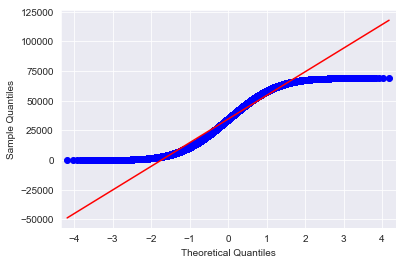

In [146]:
from statsmodels.graphics.gofplots import qqplot
from sklearn import preprocessing

asd = test406['1 non irrad'][1:]
asd = asd.values.reshape(69000,1)

# asd = preprocessing.normalize(asd.values)
# asd = asd.reshape(69000,1)

#true appearance - nice! solved
qqplot((pd.DataFrame(asd).reset_index()).iloc[:,0], line='s')
plt.show()

# asd.mean() / np.median(asd)
# log_trans = np.log(asd)
# plt.hist(log_trans)
# log_trans.mean() / np.median(log_trans)

# qqplot(test406['1 non irrad'][1:].iloc[:,13])
# # qqplot(test406['1 non irrad'][1:].iloc[:,])
# qqplot(test406['1 non irrad'][1:].iloc[:,0])
# qqplot(test406['1 non irrad'][1:].iloc[:,2])

#ordered.... quartiles or what? 
# the reason why the qqplot is failing & producing a blotch for the multiple columns has to do with the way the columns
# are being passed to the qqplot function, i.e 
# test406.iloc[1:,[1]] produces a blotch test406.iloc[1:,1] doesn't, despite the similar appearance of the dataframes when called

# for each patient, try the mean telo length. afterwards, try the individual telos in aggregate 
# go read about repeated measures model 

In [148]:
# qqplot(test406.iloc[1:,1], line='s')
# # plt.hist(one_c)
# # plt.show()

# test406.iloc[1:,1].size

In [23]:
# all_patients_df.pivot(index='patient id', columns='timepoint', values='telo data')

In [123]:
# melted_all_patients_df.head(8)

,patient id,timepoint,telo data,chr data,status,telo means,relative Q,Q freq counts
0,1,1 non irrad,0 109.810056 1 72.854749 2 ...,chr data,IT WORKS PEGGY <333,84.796738,Q1,1195.0
1,1,2 irrad @ 4 Gy,0 70.743017 1 90.804469 2 ...,chr data,IT WORKS PEGGY <333,90.975987,Q1,724.0
2,1,3 B,0 93.972067 1 165.770950 2 ...,chr data,IT WORKS PEGGY <333,116.780229,Q1,231.0
3,1,4 C,0 59.128492 1 81.301676 2 ...,chr data,IT WORKS PEGGY <333,99.346663,Q1,372.0
4,2,1 non irrad,0 97.354722 1 120.955867 2 ...,chr data,IT WORKS PEGGY <333,119.774143,Q1,1166.0
5,2,2 irrad @ 4 Gy,0 101.288246 1 162.257870 2 ...,chr data,IT WORKS PEGGY <333,133.199629,Q1,481.0
6,2,3 B,0 149.473917 1 185.859015 2 ...,chr data,IT WORKS PEGGY <333,159.828115,Q1,292.0
7,2,4 C,0 89.487674 1 97.354722 2 ...,chr data,IT WORKS PEGGY <333,108.915685,Q1,1182.0


In [24]:
pd.options.mode.chained_assignment = None
#making df composed of in vitro vs. in vivo telo means.. ready for linear regression

in_vitro = all_patients_df.loc[all_patients_df['timepoint'] == '2 irrad @ 4 Gy'] 
in_vitro.drop(['chr data', 'status', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)
in_vitro['in vitro telo means'] = in_vitro['telo means']
in_vitro['in vitro telo data'] = in_vitro['telo data']
in_vitro.drop(['telo means', 'telo data'], axis=1, inplace=True)

in_vivo = all_patients_df.loc[all_patients_df['timepoint'] == '3 B']
in_vivo.drop(['chr data', 'status', 'Q1', 'Q2-3', 'Q4'], axis=1, inplace=True)
in_vivo['in vivo telo means'] = in_vivo['telo means']
in_vivo['in vivo telo data'] = in_vivo['telo data']
in_vivo.drop(['telo means', 'telo data'], axis=1, inplace=True)

vitro_vivo = in_vitro.merge(in_vivo, on=['patient id'])
vitro_vivo


In [149]:
# alpha = vitro_vivo['in vitro telo data'][1]
# beta = vitro_vivo['in vivo telo data'][1]

# ax = sns.distplot(alpha, hist=True)
# ax = sns.distplot(beta, hist=True)


In [150]:
pivot_all_patients_df = all_patients_df.pivot(index='patient id', columns='timepoint', values='telo means')
# pivot_all_patients_df

In [44]:
# explode_in_vitro = (in_vitro['telo data'].apply(pd.Series)
#     .merge(in_vitro, right_index = True, left_index = True)
#     .drop('telo data', axis = 1)
#     .melt(id_vars = ['patient id', 'timepoint'], value_name = "in vitro telo data exploded") 
#     .drop("variable", axis = 1)
#     .dropna())

# explode_in_vitro

# explode_in_vivo = (in_vivo['telo data'].apply(pd.Series)
#     .merge(in_vivo, right_index = True, left_index = True)
#     .drop('telo data', axis = 1)
#     .melt(id_vars = ['patient id', 'timepoint'], value_name = "in vivo telo data exploded") 
#     .drop("variable", axis = 1)
#     .dropna())

# explode_in_vivo

# vitro_vivo = in_vitro.merge(in_vivo, on=['patient id'])
# vitro_vivo


# explode_vitro_vivo = explode_in_vitro.merge(explode_in_vivo, on=['patient id'])
# explode_vitro_vivo

# explode_1_vitro = (vitro_vivo['in vitro telo data'].apply(pd.Series)
#     .merge(vitro_vivo, right_index = True, left_index = True)
#     .drop('in vitro telo data', axis = 1)
#     .melt(id_vars = ['patient id', 'timepoint_x', 'timepoint_y', 'in vivo telo data'], value_name = "in vitro telo data exploded") 
#     .drop("variable", axis = 1)
#     .dropna())

# explode_1_vitro.head(4)

# explode_2_vitro_vivo = (explode_1_vitro['in vivo telo data'].apply(pd.Series)
#     .merge(explode_1_vitro, right_index = True, left_index = True)
#     .drop('in vivo telo data', axis = 1)
#     .melt(id_vars = ['patient id', 'timepoint_x', 'timepoint_y', 'in vitro telo data exploded'], value_name = "in vivo telo data exploded") 
#     .drop("variable", axis = 1)
#     .dropna())


In [152]:
explode_telos = all_patients_df['telo data'].apply(pd.Series)
explode_telos2 = melted_all_patients_df['telo data'].apply(pd.Series)
# explode_telos.iloc[0]

# PROBLEM.. unable to plot categorical values against lists of values, i.e directly plotting timepoints agaisnt the
# individual telomere length measurements stored in each row... solution? explode individual telomere length measurement lists
# so that EACH individual telomere is associated with it's corresponding timepoints.. we'll go from a dataframe with
# 59 rows to >277,000.. pretty cool!
all_patients_df.head(4)

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,0 76.022346 1 89.748603 2 ...,chr data,IT WORKS PEGGY <333,84.796738,[1195],[2214],[1191]
1,1,2 irrad @ 4 Gy,0 93.972067 1 57.016760 2 ...,chr data,IT WORKS PEGGY <333,90.975987,[724],[2343],[1533]
2,1,3 B,0 83.413408 1 136.206704 2 ...,chr data,IT WORKS PEGGY <333,116.780229,[231],[1448],[2921]
3,1,4 C,0 119.312849 1 128.815642 2 ...,chr data,IT WORKS PEGGY <333,99.346663,[372],[2210],[2018]


In [156]:
# explode_telos

In [39]:
test1 = (explode_telos
    .merge(all_patients_df, right_index = True, left_index = True)
    .drop(['telo data', 'Q1', 'Q2-3', 'Q4'], axis = 1)
    .melt(id_vars = ['patient id', 'timepoint', 'chr data', 'status', 'telo means'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

test2 = (explode_telos2
    .merge(melted_all_patients_df, right_index = True, left_index = True)
    .drop('telo data', axis = 1)
    .melt(id_vars = ['patient id', 'timepoint', 'chr data', 'status', 'telo means', 'relative Q', 'Q freq counts'], value_name = "telo data exploded") 
    .drop("variable", axis = 1)
    .dropna())

#this melt function is yielding [array] values in the telo data column for 
#positions 271400 onwards to 271576 ... very strange! no idea why it's doing that.. I will just toss htem
#but,.. FIGURE OUT WHY the pd melt function is returning arrays!! weird!!
#didnt return array values for the 2nd test.. super wierd!

##### SOLVED ##### !

#the strange behavior observed w/ melting occurred from not properly controlling columns w/ id vars!

### at first i didnt drop the 'telo data'... i think it was being concatenated or something with the exploded telos.. not sure...

In [35]:
# test['telo data exploded'][271400]
# rows_to_drop = list(range(271400, 271577))
# test_drop = test.drop(rows_to_drop, axis=0, inplace=False)

# FIXED :) 

In [40]:
test1['telo data exploded'] = test1['telo data exploded'].astype(float)
test2['telo data exploded'] = test2['telo data exploded'].astype(float)



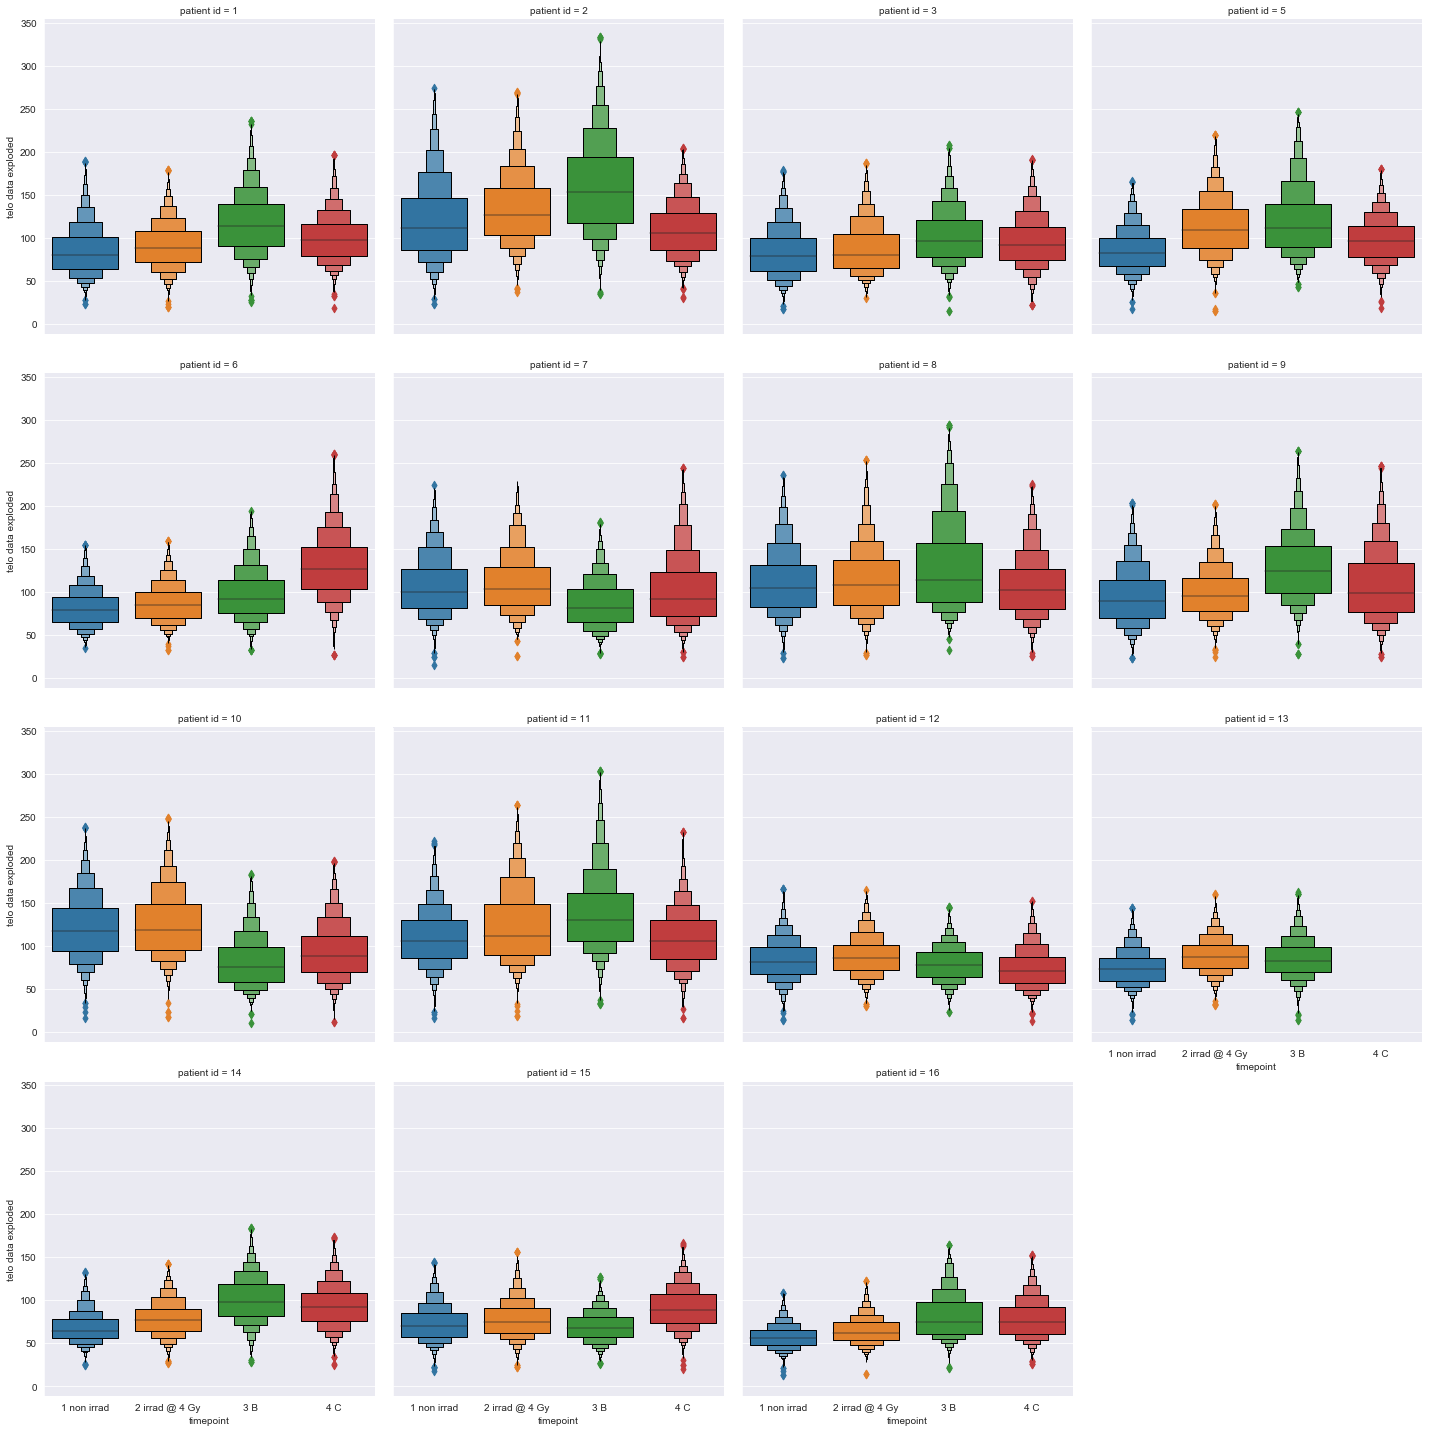

In [55]:
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
sns.catplot(x='timepoint', y='telo data exploded', col='patient id', col_wrap=4, kind='boxen', data=test_drop)

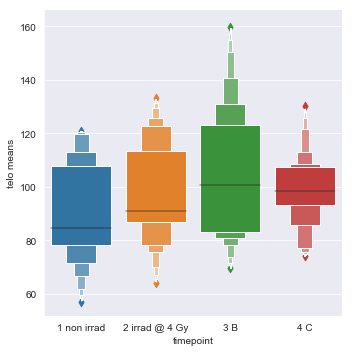

In [85]:
sns.catplot(x='timepoint', y='telo means', data=all_patients_df, kind='boxen')

<Figure size 2160x1080 with 0 Axes>

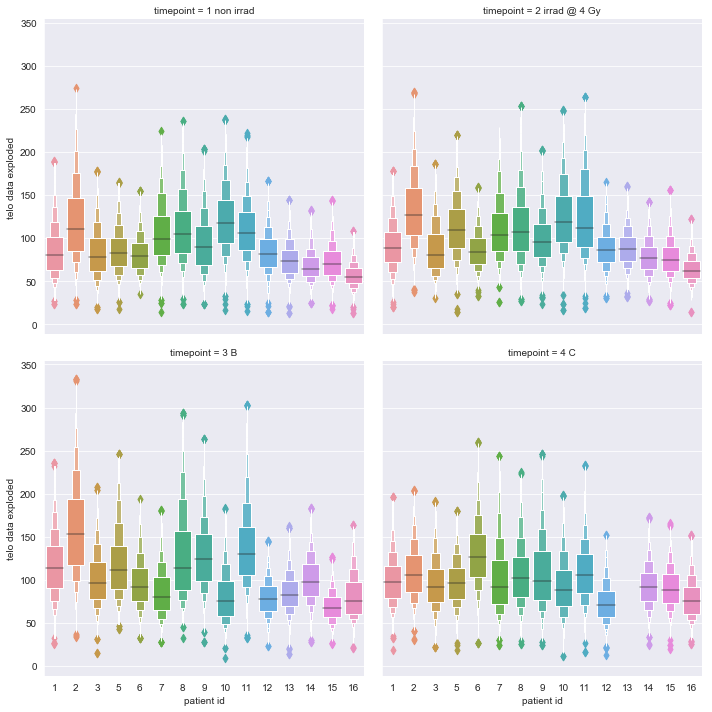

In [600]:
fig = plt.figure(figsize=(30,15))
# fig = plt.figure(figsize=(14,8))
sns.catplot(x='patient id', y='telo data exploded', col='timepoint', col_wrap=2, kind='boxen', data=test_drop)
plt.savefig(f'lynn suggestion.pdf')

In [602]:
# g = sns.FacetGrid(all_patients_df, col='timepoint', row='patient id')
# g = g.map(plt.hist, 'telo data', bins=20)

In [535]:
# sns.catplot(x='timepoint', y='telo data exploded', col='patient id', col_wrap=4, kind='bar', data=test_drop)

Text(0, 0.5, 'Individual Telos Within Pre-Rad Therapy Time point Quartiles')

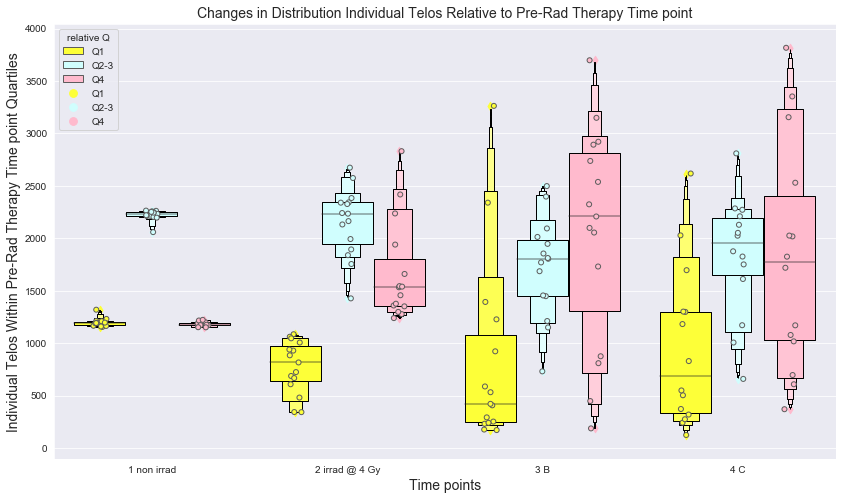

In [577]:
fig = plt.figure(figsize=(14,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#fdff38","Q2-3":"#d0fefe","Q4":"#ffbacd"}

ax = sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="black")
ax = sns.stripplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=1, color="black", dodge=True)

# ax.set(xlabel='TESTING', ylabel='common ylabel')
# fig.ax.set(xlabel='ASD')

ax=fig.gca()
ax.set_title('Changes in Distribution Individual Telos Relative to Pre-Rad Therapy Time point', fontsize=14)
ax.set_xlabel('Time points', fontsize=14)
ax.set_ylabel('Individual Telos Within Pre-Rad Therapy Time point Quartiles', fontsize=14)

### Q freq counts represents the number of individual telomeres at each timepoint
### within the quartiles established by the non irrad timepoint for each patient

In [103]:
all_patients_df


# is there a stat test for predicting a distribution from another , i.e irrad @ 4 Gyvs. B

,patient id,timepoint,telo data,chr data,status,telo means,Q1,Q2-3,Q4
0,1,1 non irrad,0 76.022346 1 89.748603 2 ...,chr data,IT WORKS PEGGY <333,84.796738,[1195],[2214],[1191]
1,1,2 irrad @ 4 Gy,0 93.972067 1 57.016760 2 ...,chr data,IT WORKS PEGGY <333,90.975987,[724],[2343],[1533]
2,1,3 B,0 83.413408 1 136.206704 2 ...,chr data,IT WORKS PEGGY <333,116.780229,[231],[1448],[2921]
3,1,4 C,0 119.312849 1 128.815642 2 ...,chr data,IT WORKS PEGGY <333,99.346663,[372],[2210],[2018]
4,2,1 non irrad,0 154.390822 1 72.770196 2 ...,chr data,IT WORKS PEGGY <333,119.774143,[1166],[2262],[1172]
5,2,2 irrad @ 4 Gy,0 146.523774 1 140.623488 2 ...,chr data,IT WORKS PEGGY <333,133.199629,[481],[2575],[1544]
6,2,3 B,0 149.473917 1 97.354722 2 ...,chr data,IT WORKS PEGGY <333,159.828115,[292],[1770],[2538]
7,2,4 C,0 94.404579 1 159.307727 2 ...,chr data,IT WORKS PEGGY <333,108.915685,[1182],[2810],[608]
8,3,1 non irrad,0 130.160037 1 101.019730 2 ...,chr data,IT WORKS PEGGY <333,83.351204,[1190],[2233],[1177]
9,3,2 irrad @ 4 Gy,0 57.309270 1 101.019730 2 ...,chr data,IT WORKS PEGGY <333,87.295754,[1006],[2235],[1359]


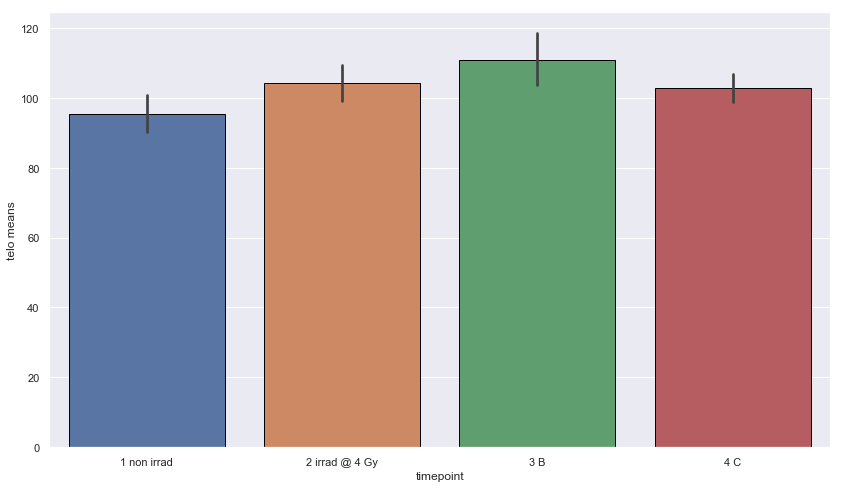

In [74]:
fig = plt.figure(figsize=(14,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
ax = sns.barplot(x="timepoint", y="telo means", data=melted_all_patients_df)

In [537]:
# y = melted_all_patients_df['telo means']
# x = melted_all_patients_df['timepoint']

# model = ols('y ~ C(x)', melted_all_patients_df).fit()
# model.summary()

In [538]:
# melted_all_patients_df.head(16)

In [539]:
### COULD I REMOVE NON RAD TIMEPOINT FROM ANALYSIS?

q = melted_all_patients_df['Q freq counts']
tp = melted_all_patients_df['timepoint']
rq = melted_all_patients_df['relative Q']

# relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(rq)', melted_all_patients_df).fit()

#with Q frequency counts as the dependent variable
#timepoint/relative Q are the inpdependent categorical values

#asking.. does the timepoint alone affect Q freq counts?
#no.. 

# print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
# model.summary()

In [289]:
melted_all_patients_df_drop_non_irrad = melted_all_patients_df[melted_all_patients_df['timepoint'] != '1 non irrad']
melted_all_patients_df_drop_non_irrad.shape

(90, 8)

In [287]:
### REMOVed NON RAD TIMEPOINT FROM ANALYSIS

q = melted_all_patients_df_drop_non_irrad['Q freq counts']
tp = melted_all_patients_df_drop_non_irrad['timepoint']
rq = melted_all_patients_df_drop_non_irrad['relative Q']

# relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(rq)', melted_all_patients_df_drop_non_irrad).fit()

#with Q frequency counts as the dependent variable
#timepoint/relative Q are the inpdependent categorical values

#asking.. does the timepoint alone affect Q freq counts?
#no.. 

print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
model.summary()

Overall model F( 8, 81) =  5.330, p =  0.0000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.330
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           2.20e-05
Time:                        10:42:15   Log-Likelihood:                -711.98
No. Observations:                  90   AIC:                             1442.
Df Residuals:                      81   BIC:                             1464.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    830.0000    219.945      3.774      0.000     392.378    1267.622
C(tp)[T.3 B]                  59.1000    311.050      0.190      0.850    -559.791     677.991
C(tp)[T.4 C]                 217.2000    311.050      0.698      0.487    -401.691     836.091
C(rq)[T.Q2-3]               1376.9000    311.050      4.427      0.000     758.009    1995.791
C(rq)[T.Q4]                  733.1000    311.050      2.357      0.021     114.209    1351.991
C(tp)[T.3 B]:C(rq)[T.Q2-3]  -563.8000    439.890     -1.282      0.204   -1439.044     311.444
C(tp)[T.4 C]:C(rq)[T.Q2-3]  -436.1000    439.890     -0.991      0.324   -1311.344     439.144
C(tp)[T.3 B]:C(rq)[T.Q4]     386.5000    439.890      0.879      0.382    -488.744    1261.744
C(tp)[T.4 C]:C(rq)[T.Q4]    -215.5000    439.890     -0.490      0.626   -1090.744     659.744
==============================================================================
Omnibus:                       17.950   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.716
Skew:                           0.708   Prob(JB):                     1.06e-08
Kurtosis:                       5.790   Cond. No.                         13.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [540]:
q = melted_all_patients_df['Q freq counts']
tp = melted_all_patients_df['timepoint']
relq = melted_all_patients_df['relative Q']

model = ols('q ~ C(tp)*C(relq)', melted_all_patients_df).fit()

#with Q frequency counts as the dependent variable
#timepoint & which quartile are the inpdependent categorical values

#asking.. does the timepoint & relative quartile affect Q freq counts?

# print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
# print(model.summary())

In [96]:
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(tp),4.600555e-22,3.0,5.481466e-28,1.000000e+00
C(relq),2.428721e+07,2.0,4.340656e+01,1.131978e-13
C(tp):C(relq),6.844244e+06,6.0,4.077387e+00,1.227585e-03
Residual,2.350020e+07,84.0,NaN,NaN


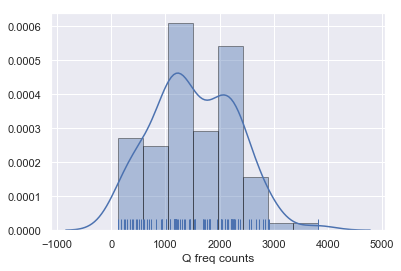

In [112]:
sns.distplot(melted_all_patients_df['Q freq counts'], rug=True)

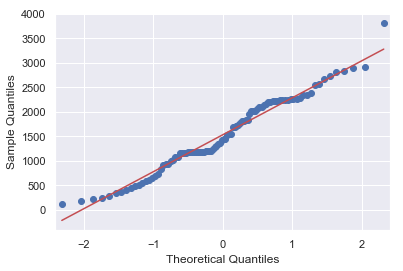

In [105]:
from statsmodels.graphics.gofplots import qqplot
qqplot(melted_all_patients_df['Q freq counts'], line='s')
plt.show()

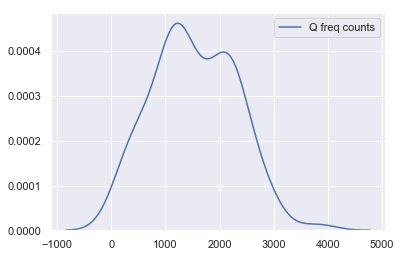

In [111]:
sns.kdeplot(melted_all_patients_df['Q freq counts'])

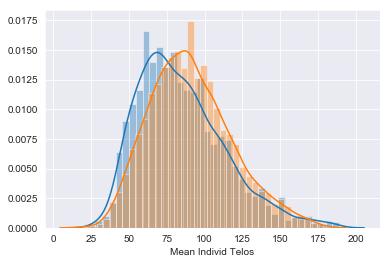

In [20]:
alpha = pd.to_numeric(all_patients_df['telo data'][0])
beta = all_patients_df['telo data'][1]

ax = sns.distplot(alpha, hist=True)
ax1 = sns.distplot(beta, hist=True)

In [541]:
print(stats.shapiro(melted_all_patients_df['Q freq counts']))
print(stats.normaltest(melted_all_patients_df['Q freq counts']))

data = melted_all_patients_df['Q freq counts']


result = stats.anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

(0.9724761247634888, 0.0014070598408579826)
NormaltestResult(statistic=3.3202815720099714, pvalue=0.19011221307837528)
Statistic: 1.639
15.000: 0.564, data does not look normal (reject H0)
10.000: 0.642, data does not look normal (reject H0)
5.000: 0.770, data does not look normal (reject H0)
2.500: 0.898, data does not look normal (reject H0)
1.000: 1.069, data does not look normal (reject H0)


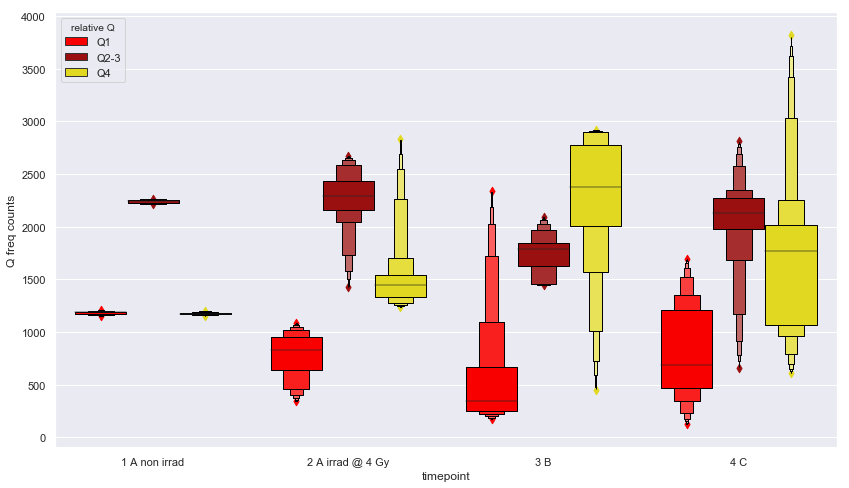

In [94]:
fig = plt.figure(figsize=(14,8))
sns.set_style(style="darkgrid",rc= {'patch.edgecolor': 'black'})
palette ={"Q1":"#f90000","Q2-3":"#9a1010","Q4":"#e1d921"}

sns.boxenplot(x='timepoint', y='Q freq counts', hue='relative Q', data=melted_all_patients_df, palette=palette,
             linewidth=2, saturation=5, color="#e79516")

In [170]:
# sns.violinplot(x='patient id', y='Q freq counts', data= melted_all_patients_df)
# yields TypeError: No loop matching the specified signature and casting
# was found for ufunc add .... possible datatype issue?

# melted_all_patients_df['timepoint'] = melted_all_patients_df['timepoint'].astype('category', ordered=True)

# plot telo means @ non irrad timepoint vs ... Q freq counts at diff timepoints

<Figure size 1008x576 with 0 Axes>

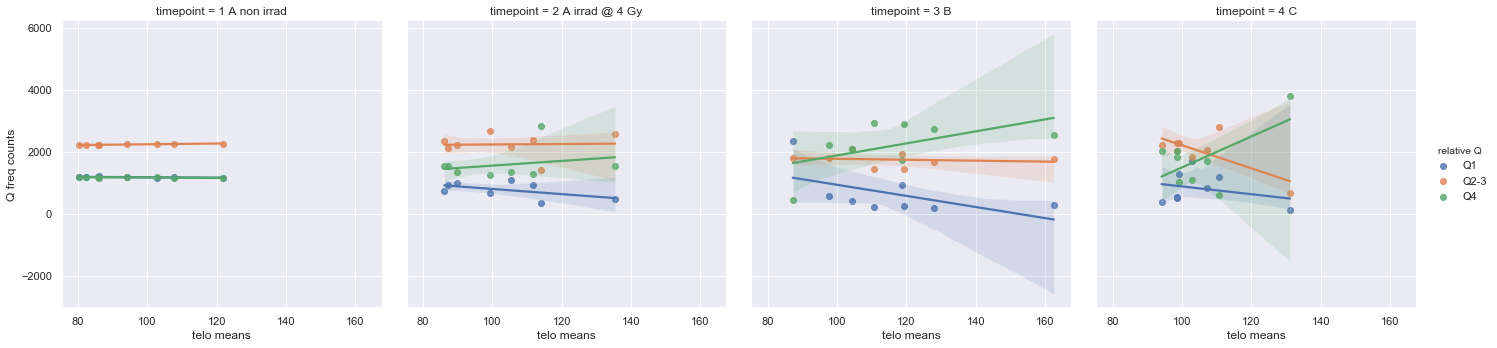

In [175]:
fig = plt.figure(figsize=(14,8))
sns.lmplot(x='telo means', y='Q freq counts', hue='relative Q', col='timepoint', data=melted_all_patients_df, truncate=True)

<Figure size 1440x1008 with 0 Axes>

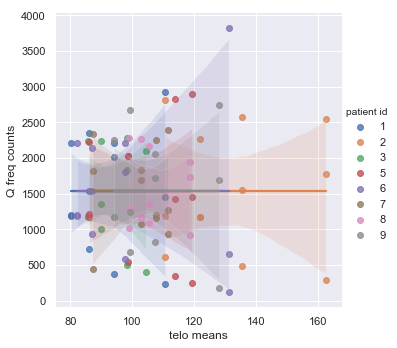

In [82]:
fig = plt.figure(figsize=(20,14))
sns.lmplot(x='telo means', y='Q freq counts', hue='patient id', data=melted_all_patients_df,
          truncate=True)
#shows that as telo means go up, more likely to see higher count in Q4, regardless of timepoint - not surprising

#what i really want to see is a plot of telo means vs. SW B & SW C . Q freq counts

In [85]:
# melted_all_patients_df

In [4]:
def gen_missing_values_andimpute_or_randomsampledown(n_cells, telosPercell, astro_df, option=None):
    #if wanted to do for max. possible telomeres, just replace the subtraction with max telos
    # print('substracts second astro from first.. equalizing second to first')

    if astro_df.size > 4600:
        astro_dfsampled = astro_df.sample(4600)
        return astro_dfsampled

    if astro_df.size > 25 and astro_df.size <= 2300:
        missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
        rsampled = astro_df.sample(missing_data_difference, replace=True, random_state=28)
        concat_ed = pd.concat([rsampled, astro_df], sort=False)
        np.random.shuffle(concat_ed.to_numpy())
        concat_ed.reset_index(drop=True, inplace=True)
        return concat_ed

    if astro_df.size > 25 and astro_df.size < 4600:
        missing_data_difference = abs( (n_cells * telosPercell) - astro_df.size )
        if option == 'rsamp':
            rsampled = astro_df.sample(missing_data_difference, random_state=28)
            # print(rsampled, rsampled.shape)
            concat_ed = pd.concat([rsampled, astro_df], sort=False)
            np.random.shuffle(concat_ed.to_numpy())
            concat_ed.reset_index(drop=True, inplace=True)
            # print(rsampled.shape, astro_df.shape, concat_ed.shape, 'rsamp', astro_df.describe(), pd.DataFrame(concat_ed).describe())
            return concat_ed
        else:
            return astro_df
    else:
        return astro_df


In [5]:
def histogram_stylizer_divyBins_byQuartile(fig, axs, n_bins, astroDF, astroquartile, astroname, axsNUMone, axsNUMtwo):

        astroarray = astroDF.to_numpy()

        N, bins, patches = axs[axsNUMone,axsNUMtwo].hist(astroarray, bins=n_bins, range=(0, 400), edgecolor='black')

        for a in range(len(patches)):
            if bins[a] <= np.quantile(astroquartile, 0.25):
                patches[a].set_facecolor('#fdff38')

            elif np.quantile(astroquartile, 0.25) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.50):
                patches[a].set_facecolor('#d0fefe')

            elif np.quantile(astroquartile, 0.50) < bins[a] and bins[a] <= np.quantile(astroquartile, 0.75):
                patches[a].set_facecolor('#d0fefe')

            elif bins[a] > np.quantile(astroquartile, 0.75): 
                patches[a].set_facecolor('#ffbacd')


        axs[axsNUMone,axsNUMtwo].set_title('Histogram of ' + astroname + 's Telomeres')
        axs[axsNUMone,axsNUMtwo].set_xlabel('Bins of Individ. Telomeres')
        axs[axsNUMone,axsNUMtwo].set_ylabel('Freqs of Individ. Telomeres')
        axs[axsNUMone,axsNUMtwo].xaxis.set_major_locator(plt.MaxNLocator(12))

In [6]:
def capture_patient_sample_ID(file):
    """
    # print(len('SW2A non irrad'),
#       len('BJ1 for SW2_'),
#       len('BJ-hTERT for SW2_'),
#       len('SW10A non irrad'),
#       len('BJ1 for SW10_'),
#       len('BJ-hTERT for SW10_'),
#       len('SW8B'),
#       len('SW14B'),
#       len('SW1A irrad @ 4 Gy'),
#       len('SW12A irrad @ 4 Gy'))

# 14 12 17 15 13 18 4 5 17 18

empty = []
for file in files:
    num, num2 = capture_patient_sample_ID(file)
    empty.append(file[num:num2])
print(empty)

# ['2', '2', '2', '10', '10', '10', '8', '15', '1', '12']
    """

    if len(file) == 14:
        #it's patient id w/ 1 sample ID digit
        num = 2
        num2 = num + 1
        return num, num2

    elif len(file) == 12:
        #it's BJ1 ctrl w/ 1 sample ID digit
        num = 10
        num2 = num+ 1
        return num, num2

    elif 'hTERT' in file and len(file) == 17:
        #it's BJ-hTERT w/ 1 sample digit
        num = 15
        num2 = num + 1
        return num, num2

    elif len(file) == 15:
        #it's patient id w/ 2 sample ID digits
        num = 2
        num2 = num + 2
        return num, num2

    elif len(file) == 13:
        #it's BJ1 ctrl w/ 2 sample ID digits
        num = 10
        num2 = num + 2
        return num, num2

    elif 'hTERT' in file and len(file) == 18:
        # it's BJ-hTERT w/ 2 sample digits
        num = 15
        num2 = num + 2
        return num, num2
    
    elif len(file) == 4:
        #it's 2nd/3rd patient timepoint w/ 1 sample digit
        num = 2
        num2 = num + 1
        return num, num2
    
    elif len(file) == 5:
        #it's 2nd/3rd patient timepoint w/ 2 sample digits
        num = 2
        num2 = num + 2
        return num, num2
    
    elif '4 Gy' in file and len(file) == 17:
        # irrad @ 4 Gy 1 sample ID digit
        num = 2
        num2 = num + 1
        return num, num2
    
    elif '4 Gy' in file and len(file) == 18:
        # irrad @ 4 Gy 2 sample ID digits
        num = 2
        num2 = num + 2
        return num, num2

In [7]:
def extract_and_clean_telos(df, file_name):

    df.rename(columns={'Unnamed: 3':'Mean Individ Telos'}, inplace=True)
    mean_values_of_individual_telomere_lengths = (df['Mean Individ Telos'])
    mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.drop(labels=[5, 192, 379, 566, 753, 940, 1127, 1314,
        1501, 1688, 1875, 2062, 2249, 2436, 2623, 2810, 2997, 3184, 3371, 3558, 3745, 3932, 4119, 4306, 4493, 4680, 4867, 5054, 5241, 5428,
        5615, 5802, 5989, 6176, 6363, 6550, 6737, 6924, 7111, 7298, 7485, 7672, 7859, 8046, 8233, 8420, 8607, 8794, 8981, 9168])

    mean_values_of_individual_telomere_lengths = mean_values_of_individual_telomere_lengths.iloc[6:9350]
    meantelos_str_toNaN = pd.to_numeric(mean_values_of_individual_telomere_lengths, errors='coerce')
    mean_individual_telos_cleaned = meantelos_str_toNaN.dropna(axis=0, how='any')
    mean_individ_df = mean_individual_telos_cleaned.to_frame(name=None)
    mean_individ_df.reset_index(drop=True, inplace=True)
    
    if 'BJ1' not in file_name and 'hTERT' not in file_name:
        telo_data = mean_individ_df[(np.abs(stats.zscore(mean_individ_df)) < 3).all(axis=1)]
        return telo_data
    else:
        return mean_individ_df
    
 